<a href="https://colab.research.google.com/github/rbarros29/Trabalho_Analise_Estatistica/blob/main/ADE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Configuração do ambiente

In [13]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import itertools as it
from itertools import product
import seaborn as sns
import plotly.offline as py
import plotly.graph_objs as go
import folium
import os

from decimal import Decimal
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


def tem_numero(string):
  return any(char.isdigit() for char in string)

def remove_repetidos(array):
    l = []
    for i in array:
        if i not in l:
            l.append(i)
    l.sort()
    return l

def numero_em_cima(rects, ax):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')


##Leitura dos dados

In [ ]:
dados = pd.read_csv('accidents.csv')
dados.dataframeName = 'Accidents'
nRow, nCol, = dados.shape

dados

##Visão geral do conjunto de dados

In [24]:
dados

,codigo_ocorrencia,ocorrencia_classificacao,ocorrencia_tipo,ocorrencia_dia,ocorrencia_horario,ocorrencia_cidade,ocorrencia_uf,ocorrencia_pais,ocorrencia_aerodromo,aeronave_matricula,...,aeronave_categoria_registro,aeronave_segmento_aviacao,aeronave_origem_voo,aeronave_destino_voo,aeronave_fase_voo,aeronave_tipo_operacao,aeronave_nivel_dano,quantidade_fatalidades,quantidade_fatores_contribuintes,dia_extracao
0,201305055424986,ACIDENTE,FALHA DO MOTOR EM VOO,2013-05-05,11:00:00,ARIQUEMES,RO,BRASIL,SJOG,PUAUN,...,PET,EXPERIMENTAL,****,****,CIRCUITO DE TRÁFEGO,VOO EXPERIMENTAL,SUBSTANCIAL,NaN,0,2018-05-06
1,201805021421302,INCIDENTE,AERÓDROMO,2018-03-09,22:40:00,CACOAL,RO,BRASIL,SSKW,PRAXL,...,TPR,REGULAR,SSKW,SBCY,TÁXI,VOO REGULAR,NENHUM,NaN,0,2018-05-06
2,201311259977425,INCIDENTE GRAVE,POUSO SEM TREM,2013-11-25,12:32:00,CACOAL,RO,BRASIL,SSKW,PTRDP,...,TPX,TÁXI AÉREO,SBJI,SSKW,POUSO,TÁXI AÉREO,SUBSTANCIAL,NaN,2,2018-05-06
3,201605160250139,INCIDENTE GRAVE,COLISÃO COM OBSTÁCULO DURANTE A DECOLAGEM E POUSO,2016-05-13,19:19:00,CACOAL,RO,BRASIL,SSKW,PTYEL,...,AIF,ADMINISTRAÇÃO INDIRETA,SSKW,SSKW,APROXIMAÇÃO FINAL,OPERAÇÃO ESPECIALIZADA,LEVE,NaN,0,2018-05-06
4,201103187273112,INCIDENTE,OUTROS,2011-03-18,13:30:00,CEREJEIRAS,RO,BRASIL,****,PTUQW,...,SAE,ESPECIALIZADA,****,****,TÁXI,OPERAÇÃO ESPECIALIZADA,SUBSTANCIAL,NaN,0,2018-05-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5111,200811264169752,INCIDENTE,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,2008-11-26,16:40:00,NÃO IDENTIFICADA,SP,BRASIL,****,PRPSD,...,TPR,REGULAR,****,****,CRUZEIRO,VOO REGULAR,NENHUM,NaN,0,2018-05-06
5112,200811224318981,INCIDENTE,TRÁFEGO AÉREO,2008-11-22,11:55:00,NÃO IDENTIFICADA,SP,BRASIL,****,PTMVE,...,TPR,REGULAR,****,****,DESCIDA,VOO REGULAR,NENHUM,NaN,0,2018-05-06
5113,200810318709738,INCIDENTE,POUSO SEM TREM,2008-10-31,18:00:00,NÃO IDENTIFICADA,GO,BRASIL,****,PTLHE,...,TPP,PARTICULAR,****,****,POUSO,VOO PRIVADO,SUBSTANCIAL,NaN,0,2018-05-06
5114,201309012098180,ACIDENTE,CAUSADO POR FENÔMENO METEOROLÓGICO EM VOO,2013-09-02,02:54:00,ÁGUAS INTERNACIONAIS,***,BRASIL,****,PTMVL,...,TPR,REGULAR,LEMD,SBGR,CRUZEIRO,VOO REGULAR,LEVE,NaN,0,2018-05-06


##Remoção de colunas

In [ ]:
remover_fator = []
for i in range(1, len(dados.columns)):
  if tem_numero(dados.columns[i]) == True:
    remover_fator.append(dados.columns[i])

dados.drop(columns=remover_fator, inplace=True)
dados.head()

##Análise dos dados

Qual o tipo de operação que mais ocorre?

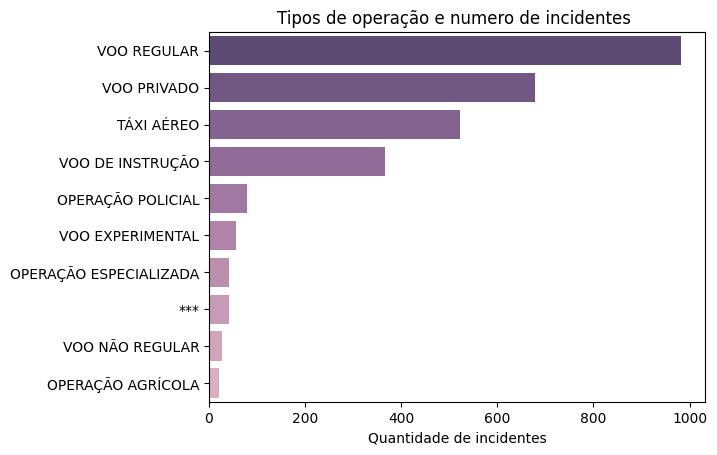

In [37]:
tipos_operacao = list(set(dados_prontos['aeronave_tipo_operacao']))
todos_inicidentes = list(dados_prontos.loc[(dados_prontos['ocorrencia_classificacao']) == 'INCIDENTE', ['aeronave_tipo_operacao']]
                         ['aeronave_tipo_operacao'])
qtd_incidentes_tipo = pd.DataFrame({'Tipo': tipos_operacao, 'Incidentes': [todos_inicidentes.count(i) for i in tipos_operacao]})
qtd_incidentes_tipo = qtd_incidentes_tipo.sort_values(['Incidentes'])

todos_acidentes = list(dados_prontos.loc[(dados_prontos['ocorrencia_classificacao']) == 'ACIDENTE', ['aeronave_tipo_operacao']]
                         ['aeronave_tipo_operacao'])
qtd_acidentes_tipo = pd.DataFrame({'Tipo': tipos_operacao, 'Acidentes': [todos_acidentes.count(i) for i in tipos_operacao]})
qtd_acidentes_tipo = qtd_acidentes_tipo.sort_values(['Acidentes'])

f, ax = plt.subplots()
pallete = sns.cubehelix_palette(10, 3, 0.4, 0.60, 0.8, 0.6)

sns.barplot(x = qtd_incidentes_tipo['Incidentes'], y = qtd_incidentes_tipo['Tipo'], palette=pallete)

ax.invert_yaxis()
ax.set_xlabel('Quantidade de incidentes')
ax.set_ylabel("")
ax.set_title('Tipos de operação e numero de incidentes ')

plt.show()

Qual a região com maior número de ocorrências?

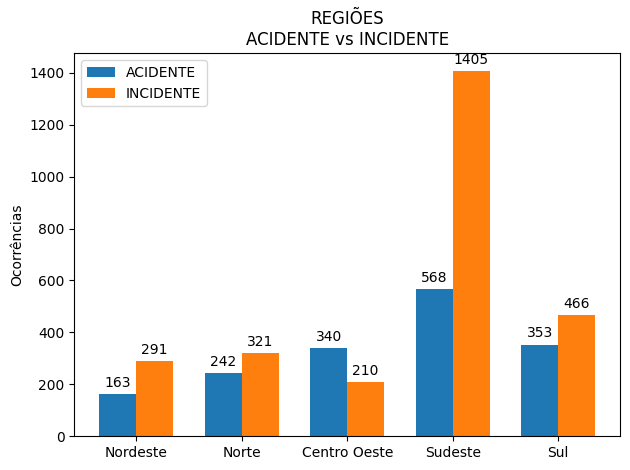

In [47]:
x = np.arange(5)
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, dados_regioes['ACIDENTE'], width, label='ACIDENTE')
rects2 = ax.bar(x + width/2, dados_regioes['INCIDENTE'], width, label='INCIDENTE')

ax.set_ylabel('Ocorrências')
ax.set_title('REGIÕES\nACIDENTE vs INCIDENTE')
ax.set_xticks(x)
ax.set_xticklabels(dados_regioes['tipo'])
ax.legend()

numero_em_cima(rects1, ax)
numero_em_cima(rects2, ax)

fig.tight_layout()

plt.show()

Quais as cidades com maior número de fatalidades?

In [52]:
cidades = ['RIO DE JANEIRO', 'SAO PAULO', 'BELO HORIZONTE', 'BRASILIA', 'GUARULHOS']
anos = sorted(list(set(dados_prontos['ano'])))
not_null = dados_prontos.dropna()
dic_anos = {i: [int(not_null.loc[not_null['ano'] == ano,
                             ['quantidade_fatalidades']].loc[not_null['ocorrencia_cidade'] == i,
                                                             ['quantidade_fatalidades']].sum()) for ano in anos] for i in cidades}
dic_anos['ano'] = anos
dados_anos = pd.DataFrame(dic_anos)
dados_anos

,RIO DE JANEIRO,SAO PAULO,BELO HORIZONTE,BRASILIA,GUARULHOS,ano
0,4,0,4,0,0,2008
1,0,0,0,0,0,2009
2,6,1,2,0,0,2010
3,3,0,0,0,0,2011
4,4,3,0,0,0,2012
5,0,1,0,0,0,2013
6,2,0,0,2,0,2014
7,0,0,3,0,0,2015
8,4,7,0,0,0,2016
9,0,0,0,0,0,2017


Em Belo Horizonte, qual o tipo de operação com o maior número de ocorrências?

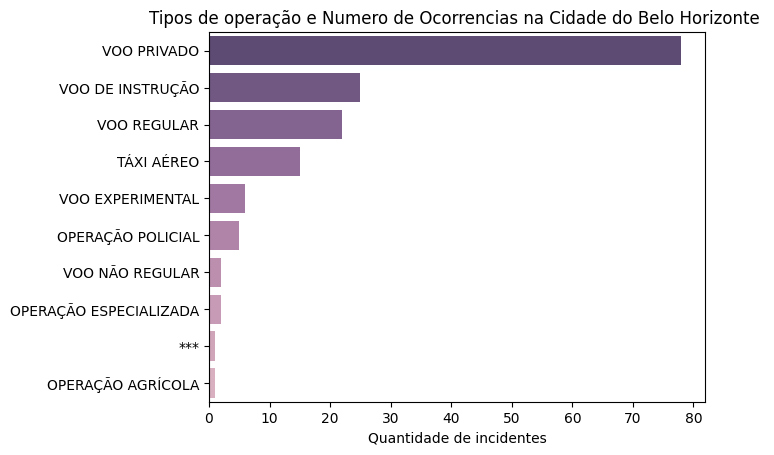

In [55]:
operacao_rj = list(set(dados_prontos['aeronave_tipo_operacao']))
todos_operacao_rj = list(dados_prontos.loc[(dados_prontos['ocorrencia_cidade'])=='BELO HORIZONTE',
                                           ['aeronave_tipo_operacao']]
                         ['aeronave_tipo_operacao'])

qtd_operacao_rj = pd.DataFrame({'Tipo':operacao_rj, 'Ocorrencia': [todos_operacao_rj.count(i) for i in operacao_rj]})
qtd_operacao_rj = qtd_operacao_rj.sort_values(['Ocorrencia'])

f, ax = plt.subplots()
pallete = sns.cubehelix_palette(10, 3, 0.4, 0.60, 0.8, 0.6)

sns.barplot(x = qtd_operacao_rj['Ocorrencia'],y = qtd_operacao_rj['Tipo'], palette=pallete)

ax.invert_yaxis()
ax.set_xlabel('Quantidade de incidentes')
ax.set_ylabel("")
ax.set_title('Tipos de operação e Numero de Ocorrencias na Cidade do Belo Horizonte ')

plt.show()
